In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [5]:
# Null Values

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
# Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x24d6afdc210>,
 'caps': [<matplotlib.lines.Line2D at 0x24d6b015950>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d6b00b190>],
 'medians': [<matplotlib.lines.Line2D at 0x24d6b017290>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d6b017cd0>],
 'means': []}

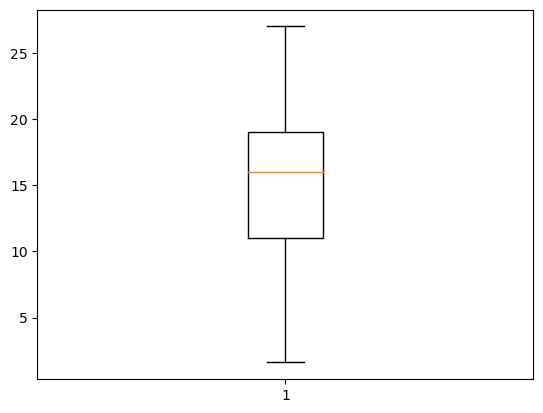

In [9]:
col=df["Sales"]
plt.boxplot(col)

In [10]:
df_new=df[df["Newspaper"]<90]
df_new

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


{'whiskers': [<matplotlib.lines.Line2D at 0x24d6b0bf6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24d6b0c9010>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d6b0beb90>],
 'medians': [<matplotlib.lines.Line2D at 0x24d6b0ca710>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d6b0cb1d0>],
 'means': []}

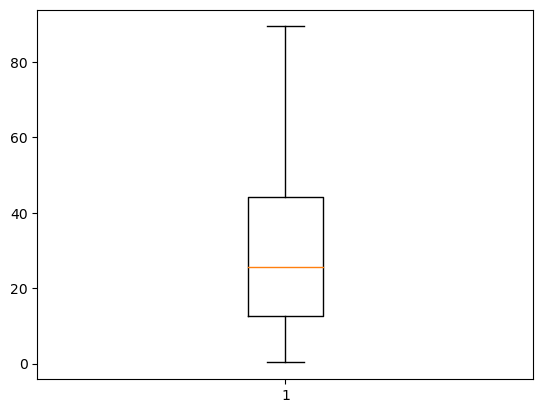

In [11]:
col=df_new["Newspaper"]
plt.boxplot(col)

In [12]:
# Correlation

<Axes: >

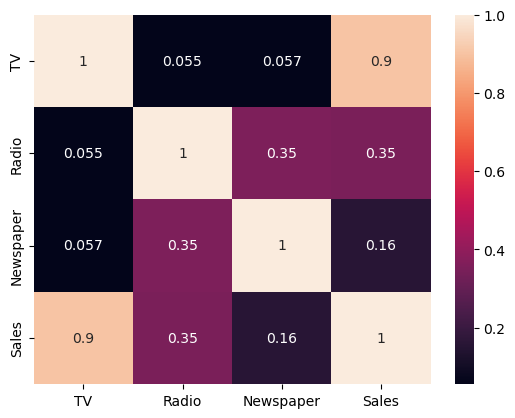

In [13]:
sns.heatmap(df.corr(),annot=True)

# Linear Regression

In [14]:
# Assumption/Requirement checking

In [15]:
# 1] Linearity: check independent column is correlated with dependent column. This will be checked by Heat Map.
#               Note: Range of correlation is between -1 to 1.

# 2] No multi-colinearity:a] First we need to check this on independenpt col. 
#                         b] Data correlation is above 0.1 are considered as multi-colinearity and the data correlation is below 0.1 then no correlation.
#                         c] If the data has multi correlation then drop the column if data set and column is large.
#                         Note: But here, data column is less so we will leave the data set and considered as verified.


# 3] No auto correlation:a] Auto correlation means correlation between the values.
#                        b] Here, we need to analyze the time series between the value.
#                        c] Means by viewing column value, understanding the auto correlation..
# 4] No outliers
# 5] No null values
# 6] char to number

In [16]:
for i in df.columns:
    print(f"Unique data:{i}\n\n{df[i].unique()}\n")

Unique data:TV

[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7  53.5
 261.3 239.3 102.7 131.1  69.   31.5 139.3 216.8 199.1 109.8  26.8 129.4
 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4 213.5 193.2
  76.3 110.7  88.3 134.3  28.6 217.7 250.9 107.4 163.3 197.6 184.9 289.7
 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4  13.1 255.4 225.8
 241.7 175.7 209.6  78.2  75.1 139.2 125.7  19.4 141.3  18.8 224.  123.1
 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2   8.4 219.8  36.9  48.3
  25.6 273.7  43.   73.4 193.7 220.5 104.6  96.2 140.3 243.2  38.   44.7
 280.7 121.  171.3 187.8   4.1  93.9 149.8  11.7 131.7 172.5  85.7 188.4
 163.5 117.2 234.5  17.9 206.8 215.

# Linear Regression formula

In [17]:
# y = b0 + b1*1(Column name: eg-"TV") + b2*2 + b3*3 +.....+ bn*n

In [18]:
# In the above formula y is dependent and x is independent.

In [19]:
# Step1: Define the x and y
# Here, we are using 2 bracket in x. The reason is we are using multiple Column in data frame. So whenever we use multiple column then put data in list or tuple.

In [20]:
x = df[["TV","Radio","Newspaper"]]
y = df[["Sales"]]

In [21]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [22]:
y

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


In [23]:
df.shape

(200, 4)

In [24]:
x.shape

(200, 3)

In [25]:
y.shape

(200, 1)

In [26]:
# Step 2: import train_test_split function from sklearn.model_selection lib. and split the x and y data as per train and test.

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) # 20% to 30%

In [28]:
print(x_train.shape)
print(x_test.shape)
print()
print(y_test.shape)
print(y_train.shape)


(160, 3)
(40, 3)

(40, 1)
(160, 1)


In [29]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [30]:
lm.fit(x_train,y_train)

LinearRegression()

In [31]:
# y = b0 + b1x1 + b2x2 + b3x3

# here coef=b1/b2/b3
# b0=0 by default also called as intercept

In [42]:
print(lm.coef_)

[[5.31720727e-02 1.13445345e-01 7.23932242e-05]]


In [33]:
print(lm.intercept_)

[4.63774597]


<Axes: >

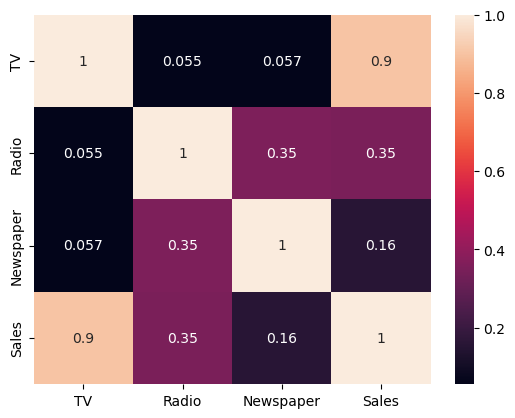

In [34]:
sns.heatmap(df.corr(),annot=True)

In [37]:
y_pred = lm.predict(x_test)

In [38]:
y_pred

array([[ 9.88994362],
       [13.45710815],
       [15.75899107],
       [ 8.17025679],
       [10.20302379],
       [24.4868427 ],
       [10.61488076],
       [20.87058021],
       [16.22505082],
       [24.81338174],
       [10.65324986],
       [ 9.97841125],
       [17.57834203],
       [15.61571147],
       [16.84987746],
       [ 7.0064464 ],
       [12.75216056],
       [13.69031161],
       [23.39163287],
       [18.6960532 ],
       [11.46557019],
       [ 9.88567252],
       [12.02803321],
       [15.7273112 ],
       [11.06555799],
       [19.18841262],
       [17.50670426],
       [ 5.38153153],
       [17.00274099],
       [16.63669389],
       [10.50038752],
       [19.30055569],
       [20.95755021],
       [13.73040709],
       [21.1948927 ],
       [15.86551172],
       [ 8.21671337],
       [23.3796847 ],
       [18.27181279],
       [10.53297424]])

In [39]:
new_data12 = pd.DataFrame()
new_data12 = x_test
new_data12['Sales']= y_test
new_data12['predicted sales']= y_pred
new_data12

,TV,Radio,Newspaper,Sales,predicted sales
12,23.8,35.1,65.9,9.2,9.889944
63,102.7,29.6,8.4,14.0,13.457108
171,164.5,20.9,47.4,17.5,15.758991
132,8.4,27.2,2.1,5.7,8.170257
196,94.2,4.9,8.1,14.0,10.203024
198,283.6,42.0,66.2,25.5,24.486843
125,87.2,11.8,25.9,10.6,10.614881
84,213.5,43.0,33.8,21.7,20.870580
167,206.8,5.2,19.4,17.2,16.225051
183,287.6,43.0,71.8,26.2,24.813382


In [40]:
lm.score(x_train,y_train)*100

89.85264045534859

In [41]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

R-squared: 0.9134494237873653
RMSE: 1.6357202379405176


# Code to save the Model

In [45]:
import joblib

In [46]:
joblib.dump(lm,"linearRegression_model.pkl")

['linearRegression_model.pkl']

# Another Example

In [53]:
data=pd.read_csv(r"C:\Users\manda\Downloads\car_prediction_data.csv")

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [55]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
